# Modeling and training 

this section remains the same 

In [1]:
import numpy as np
import random 
import os 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical, img_to_array, load_img 
from tensorflow.keras.datasets import fashion_mnist

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist('fashionmnist', kind='train')
X_test, y_test = load_mnist('fashionmnist', kind='t10k')

In [4]:
X_test.shape

(10000, 784)

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train[1000]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 97],
        [ 84],
        [ 97],
        [110],
        [108],
        [ 87],
        [ 97],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 19],
        [255],
        [199],
        [183],
        [142],
        [161],
        [200],
        [213],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 30, 30, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                        

In [12]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [18]:
history = model.fit(X_train, y_train_ohe, epochs=5, validation_data=(X_test, y_test_ohe), batch_size=300)

Epoch 1/5
200/200 [==============================] - 65s 310ms/step - loss: 0.6728 - accuracy: 0.7580 - val_loss: 0.4430 - val_accuracy: 0.8463
Epoch 2/5
200/200 [==============================] - 72s 359ms/step - loss: 0.4162 - accuracy: 0.8530 - val_loss: 0.3696 - val_accuracy: 0.8743
Epoch 3/5
200/200 [==============================] - 69s 344ms/step - loss: 0.3579 - accuracy: 0.8722 - val_loss: 0.3357 - val_accuracy: 0.8816
Epoch 4/5
200/200 [==============================] - 69s 345ms/step - loss: 0.3329 - accuracy: 0.8816 - val_loss: 0.3175 - val_accuracy: 0.8912
Epoch 5/5
200/200 [==============================] - 73s 365ms/step - loss: 0.3067 - accuracy: 0.8890 - val_loss: 0.2949 - val_accuracy: 0.8971


<AxesSubplot: >

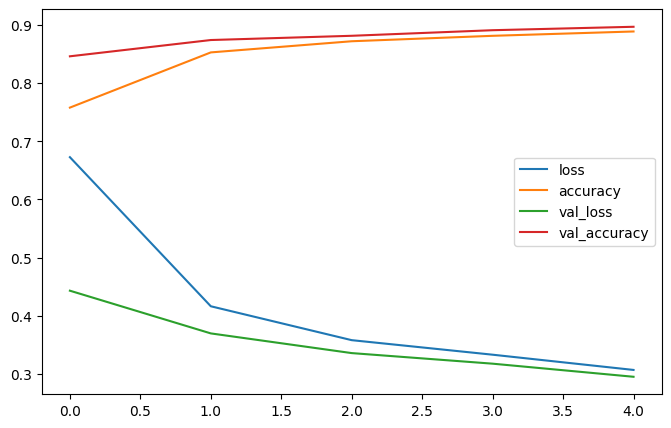

In [19]:
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pd.DataFrame(history.history).plot(figsize=(8,5))

In [20]:
history.history

{'loss': [0.6727520227432251,
  0.4162473976612091,
  0.3579256236553192,
  0.3329200744628906,
  0.3067057430744171],
 'accuracy': [0.7580333352088928,
  0.8530166745185852,
  0.8722000122070312,
  0.8815500140190125,
  0.8890166878700256],
 'val_loss': [0.4430413544178009,
  0.3695567846298218,
  0.3356824815273285,
  0.3174755871295929,
  0.29493874311447144],
 'val_accuracy': [0.8463000059127808,
  0.8743000030517578,
  0.881600022315979,
  0.8912000060081482,
  0.8970999717712402]}

In [21]:
model.save('masoud.h5')

In [23]:
# MasoudKaviani.ir

# Monitoring feature maps after each layer

Define a new model that outputs intermediate representations for all layers

In [14]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

Prepare a random input image from the training set

In [21]:
random_index = random.randint(0, X_train.shape[0] - 1)
img = X_train[random_index]
img = np.expand_dims(img, axis=0) 

Run the image through the network, thus obtaining all intermediate representations for this image

In [22]:
successive_feature_maps = visualization_model.predict(img)

1/1 [==============================] - 0s 35ms/step


Display the representations

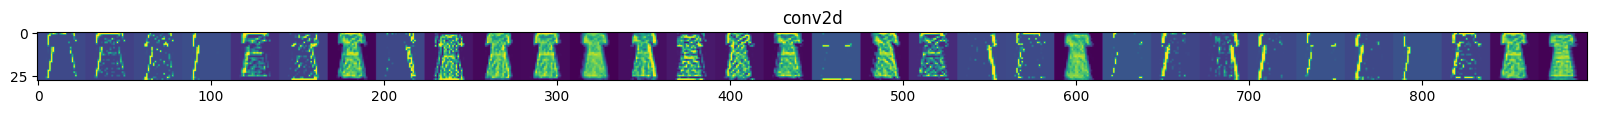

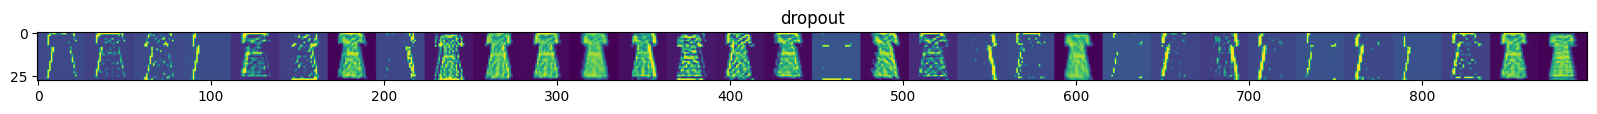

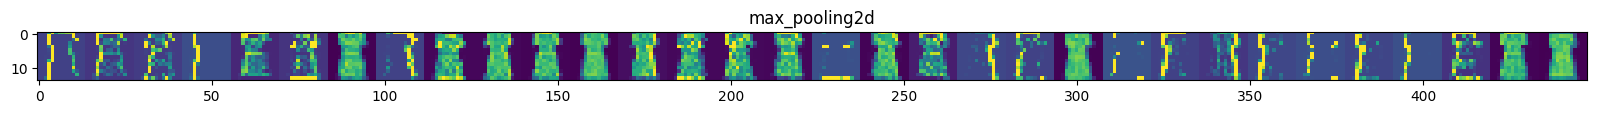

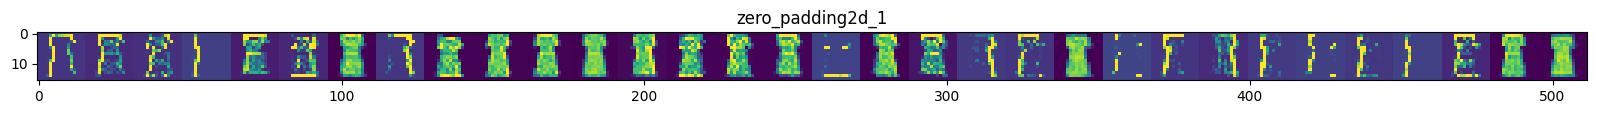

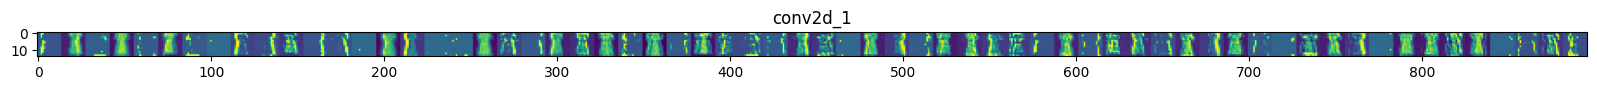

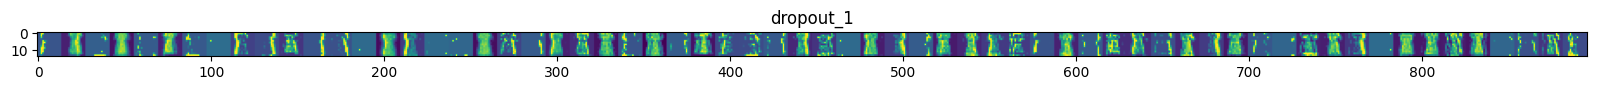

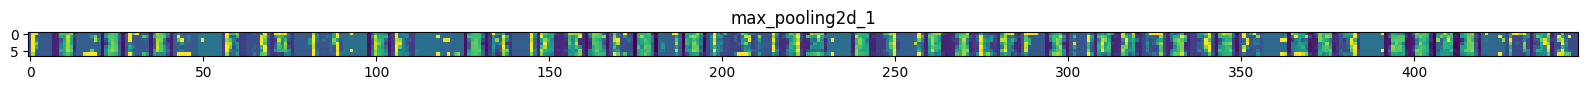

In [23]:
layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()